<a href="https://colab.research.google.com/github/carolinatobias/InteligenciaArtificial/blob/main/PIAIA59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **PRODUCTO INTEGRADOR DE APRENDIZAJE**

Carolina monserrat Tobía García 1806545
Carlos Iván Ortiz Galván 1849283
Oscar Daniel García Juárez 1844282
Fabiola Alejandra Fabela Alvarado 1846452 
Sebastián Alejandro Solis Quiróz 1816855 
Oscar Josemario Gamboa Ortega 1867917

Inteligencia Artificial Jueves N4

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import keras
from keras.datasets import cifar100
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')
train_images = train_images / 255.0
test_images = test_images / 255.0

169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(256, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(20))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         590080    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 256)        0

In [ ]:
model.compile(loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=25, batch_size=200,
                  validation_data=(test_images, test_labels))

Epoch 1/25
250/250 [==============================] - 51s 78ms/step - loss: 2.6966 - accuracy: 0.1707 - val_loss: 2.4150 - val_accuracy: 0.2562
Epoch 2/25
250/250 [==============================] - 19s 76ms/step - loss: 2.3114 - accuracy: 0.2891 - val_loss: 2.1869 - val_accuracy: 0.3257
Epoch 3/25
250/250 [==============================] - 19s 77ms/step - loss: 2.1056 - accuracy: 0.3498 - val_loss: 2.0620 - val_accuracy: 0.3669
Epoch 4/25
250/250 [==============================] - 19s 76ms/step - loss: 1.9534 - accuracy: 0.3985 - val_loss: 1.8514 - val_accuracy: 0.4277
Epoch 5/25
250/250 [==============================] - 19s 77ms/step - loss: 1.8209 - accuracy: 0.4349 - val_loss: 1.8081 - val_accuracy: 0.4432
Epoch 6/25
250/250 [==============================] - 19s 77ms/step - loss: 1.7160 - accuracy: 0.4641 - val_loss: 1.6089 - val_accuracy: 0.5018
Epoch 7/25
250/250 [==============================] - 19s 76ms/step - loss: 1.6359 - accuracy: 0.4887 - val_loss: 1.6041 - val_accuracy:

313/313 - 3s - loss: 1.3899 - accuracy: 0.5920 - 3s/epoch - 9ms/step


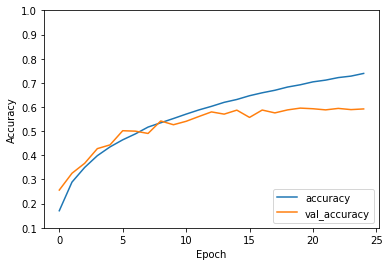

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.5920000076293945
